In [1]:
#I first import all the necessary libraries, some I added further into my work when I saw the need for one.
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import statistics 

filename = 'vgsales.csv'
data = pd.read_csv(filename)
data.head()  #this displays only the first 5 entries in the dataset and acted as a reference
#data.info()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
#summary statistics
#the following variables are set to find the required statistics 
pub = data['Publisher']
n = 0
NA_sales = [] #I created an empty list so I could add all the Ninetendo sales in North America in it
NA_count = 0
JP_sales = []
JP_count = 0
na = data['NA_Sales']
jp = data['JP_Sales']

total_na = sum(na) #using the sum function to find the total videogame sales in North America 
total_jp = sum(jp)

for i in range(len(pub)): #this was a random choice, all the initial lists will have the same length. 
    if pub[i] == 'Nintendo' and na[i] == na[i]:  #this sets the criteria to sort Nintendo sales in America 
        NA_sales.append(na[i])    #adding the the Nintendo sales in America values in the list
        NA_count += na[i]         #this creates a subset of total_na to find the total Nintendo sales in America  
        n += 1                    #counts the number of Nintendo games publishes, which gives us the count of the groups. 
    if pub[i] == 'Nintendo' and jp[i] == jp[i]:
        JP_sales.append(jp[i])
        JP_count += jp[i]
        

#the following functions from the relevant libraries are used to find the mean, median, mode and standard deviation. 
NA_mean = np.mean(NA_sales)
JP_mean = np.mean(JP_sales)

NA_sales.sort()
JP_sales.sort()
NA_median = np.median(NA_sales)
JP_median = np.median(JP_sales)

NA_mode = stats.mode(NA_sales)
JP_mode = stats.mode(JP_sales)

NA_std = statistics.stdev(NA_sales)
JP_std = statistics.stdev(JP_sales)


print(n)
print('Nintendo sales (NA) =', round(NA_count, 2))
print('Ninetnedo sales (JP) =', round(JP_count, 2))
print('total sales (NA) =', round(total_na, 2), '      ' ,'total sales (JP) =', round(total_jp, 2))
print('Mean (NA)=', round(NA_mean, 2), '      ' ,'Mean (JP) =', round(JP_mean, 2))
print('Median (NA)=', round(NA_median, 2), '      ' ,'Median (JP) =', round(JP_median, 2))
print('Mode (NA)=', NA_mode, '      ' ,'Mode (JP) =', JP_mode)
print(round(NA_std,2), round(JP_std, 2))

696
Nintendo sales (NA) = 815.75
Ninetnedo sales (JP) = 454.99
total sales (NA) = 4327.65        total sales (JP) = 1284.27
Mean (NA)= 1.17        Mean (JP) = 0.65
Median (NA)= 0.38        Median (JP) = 0.28
Mode (NA)= ModeResult(mode=array([0.]), count=array([171]))        Mode (JP) = ModeResult(mode=array([0.]), count=array([71]))
2.99 1.06


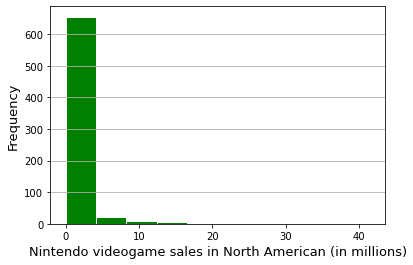

In [22]:

#histogram for Nintendo sales in North America. I reused my previous code from NS50 pre-class works on data vizualization classes

plt.hist(NA_sales, color = 'green', align = 'mid', edgecolor = 'white')
plt.xlabel('Nintendo videogame sales in North American (in millions)', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
#plt.grid('True')
axes = plt.gca()
axes.yaxis.grid()
plt.show()



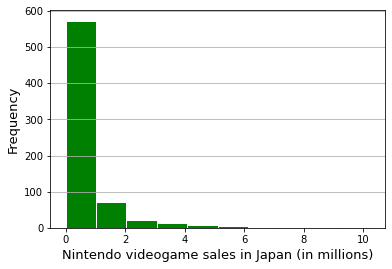

In [21]:
#histogram for Nintendo sales in Japan 

plt.hist(JP_sales, color = 'green', align = 'mid', edgecolor = 'white')
plt.xlabel('Nintendo videogame sales in Japan (in millions)', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
#plt.grid('True')
axes = plt.gca()
axes.yaxis.grid()
plt.show()

In [3]:
#confidence intervals 

NAstd = NA_std*(n/(n-1))  #applying bressel's correction to standard deviations found before
JPstd = NA_std*(n/(n-1))

p_estimate = NA_mean - JP_mean   #the point estimate of the difference of the two means
SE = (NAstd**2/n + JPstd**2/n)**0.5   #this standard error formula is specific to when working with two means
df = n - 1   #degree of freedoms

t_score =stats.t.cdf(0.95, df) #this t-distribution function uses the cofidence level and degrees of freedom to find the t-score
upper_bound = p_estimate + (t_score*SE)
lower_bound = p_estimate - (t_score*SE)


#signifiance level 
#the following code was taken from the pynomia example in session 13.2 of CS50
Tscore = (p_estimate)/SE  #this is the basic formula to find a t-value (x1 - x2)/standard error
pvalue = 2*stats.t.cdf(-Tscore,df)   
#the above function calculates the area under the curve of t-distribution curve. 
#As the distribution is symmetric, -t is used to calculate the area outside the percentile area. 

SDpooled = np.sqrt((NA_std**2*(n-1) + JP_std**2*(n-1))/(n+n-2))  #pooled standard deviation. The formula is simply applied. 
cohensd = (p_estimate)/SDpooled
hedgesd = 1 - (3/(4*(2*n)-9))  #hedge's d is a correction value. The formula was simply used
effectsize = cohensd * hedgesd

print('T-score =', Tscore, 'Standard eror =', SE)
print('Point estimate =', round(p_estimate, 3), 'Confidence interval [',round(lower_bound, 3),',',round(upper_bound, 3), ']')
print('p =', round(pvalue, 7))
print('effect size =', effectsize)
print('cohens d', round(cohensd, 6))
print(t_score)

T-score = 3.2293550858174065 Standard eror = 0.16050676359801228
Point estimate = 0.518 Confidence interval [ 0.385 , 0.651 ]
p = 0.0012991
effect size = 0.23087646989890917
cohens d 0.231001
0.8287787583517313


In [25]:
def mode(var):
    frequency = []
    for i in range(len(var)): #the nested for loops allow one each value of the list to be compared with the rest of them
        for a in range(len(var)):
            total = -1 #the -1 balances the 1 that will result from the comparision of the value with itself
            if var[i] == var[a]:
                total += 1 #if two values are equal it adds to the total for that value to show its frequency
                frequency.append(total)
            if max(frequency) == 0:
                return("There is no mode")
            else:
                m = frequency.index(max(frequency)) # m finds the index of the value with the highest frequency in the list
                return("Mode =", var[m])
                return(frequency)

print(mode(NA_sales))
print(mode(JP_sales))


There is no mode
There is no mode
